# Importing packages

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

# finding the Principal components

In [2]:
dim_req = 64
x_digits = np.asmatrix(digits.data)
print(x_digits.shape)

# mean centering
x_digits = x_digits - np.mean(x_digits , axis = 0)

# finding covariance matrix
co_vaiance = (x_digits.T * x_digits)/x_digits.shape[0]
print(co_vaiance.shape)

# finding eigen values and eigen vectors
x_eig_values , x_eig_vectors = np.linalg.eig(co_vaiance)
print(x_eig_values.shape)
print(x_eig_vectors.shape)

# finding the transformed matrix
y_digits = x_digits * x_eig_vectors[:,0:dim_req]
print(y_digits.shape)

(1797, 64)
(64, 64)
(64,)
(64, 64)
(1797, 64)


# Ploting the proportian of variance contained in each principle component

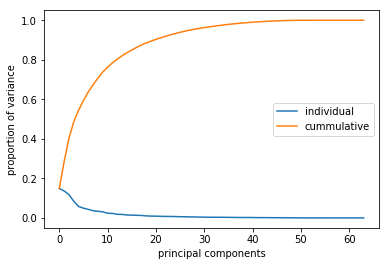

In [3]:
prop_variance = x_eig_values/np.sum(x_eig_values)

plt.plot(np.arange(64),prop_variance , label = "individual")
plt.plot(np.arange(64),np.cumsum(prop_variance) , label = "cummulative")
plt.legend()
plt.xlabel("principal components")
plt.ylabel("proportion of variance")
plt.show()